# Projet3 : Chaines de Markov et épidémiologie 

In [35]:
#quelques bibliothèque utiles
import numpy as np
import random as rd
import time
import matplotlib.pyplot as plt

# Partie 1
### Question 1 : 
A partir de la séquence d’observation S, S, S, I, I, I, I, I, I, R, on peut déduir les pobabilité de transition comme la formule suivant : $p(x|y)=P(c_i|c_{i-1})$ avec $x, y \in \{S, I, R \}$

Et la matrice de probabilité de transitions est :
$$\begin{matrix}
 & S & I & R \\
S & \frac{2}{3} & \frac{1}{3} & 0 \\
I & 0 & \frac{5}{6} & \frac{1}{6} \\
R & 0 & 0 & 1 
\end{matrix}$$

In [36]:
#Partie 1; Question 2 lire des données
np.loadtxt('data_exo.txt')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 2., 2., 2.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [37]:
#Partie 1; Question 1.3
def matriceTransition(ficNom):
    """
    Entree : nom du ficher
    Sortie : la matrice de probabilité de transitions
    """
    ls = np.loadtxt(ficNom)
    ss, si, ii, ir, rr, rs = 0, 0, 0, 0, 0, 0  
    
    for i in range(0, len(ls)):
        l = len(ls[i])
        #les cas different
        for j in range(1, l):
            if(ls[i][j-1] == 0 and ls[i][j] == 0):
                ss+=1
            if(ls[i][j-1] == 0 and ls[i][j] == 1):
                si+=1
            if(ls[i][j-1] == 1 and ls[i][j] == 1):
                ii+=1
            if(ls[i][j-1] == 1 and ls[i][j] == 2):
                ir+=1
            if(ls[i][j-1] == 2 and ls[i][j] == 2):
                rr+=1
            if(ls[i][j-1] == 2 and ls[i][j] == 0):
                rs+=1
    #calculation
    return np.array([[ss/(ss + si), (si/(ss + si)), 0], 
                    [0, ii/(ii + ir), ir/(ii + ir)], 
                    [rs/(rs + rr), 0, rr/(rs + rr)]])
        

In [38]:
#test pour matriceTransition()
matriceTransition('data_exo.txt')

array([[0.93082918, 0.06917082, 0.        ],
       [0.        , 0.93518148, 0.06481852],
       [0.04065945, 0.        , 0.95934055]])

# Partie 2 
### Question 1:
A partir du graphe de transition, la matrice de transition A est :
$$\begin{matrix}
 & S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0 & 0 & 1 
\end{matrix}$$

Pour vérifier si une matrice de transition est stochastique, on doit ajouter la valeur de contenue de chaque ligne. Si la somme vaut 1, la matrice est stochastique.

In [39]:
def verifierMat(matrice):
    """
    Entree : une matrice en format de list[list[float]]
    Sorite : retourne 1 si la matrice est stochastique, et 0 sinon
    """
    #parcours la matrice
    for i in range(len(matrice)):
        sommeLigne=0
        for j in range(len(matrice[i])):
            sommeLigne+=matrice[i][j]
        if not sommeLigne==1:
            return 0
    return 1

In [57]:
#test pour verifierMat()
MatA=np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
print(verifierMat(MatA))

1


### Question 2 :
Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.
Donc, on a : $\pi_0 = [0.9, 0.1, 0]$

# Distribution $π_t$
### Question 1 :

### Question 2 :


In [117]:
#Question 3 : La distribution théorique dans chaque états
def calDistribution(t, matrice, pi_0):
    """
    Entree : 
        t: le temps pour chaque états
        matrice : la matrice de transition
        pi_0 : distribution de probabilité initiale
    Sortie :
        distribution théorique des effectifs
    """
    res=list(pi_0)
    for i in range(t):
        tmp=res
        #calculation pour les 3 états : S, I, R
        res[0]=tmp[0]*matrice[0][0]
        res[1]=tmp[0]*matrice[0][1] + tmp[1]*matrice[1][1]
        res[2]+=tmp[1]*matrice[1][2]
    return res

# Question 4 : Tracer la graphe de la probabilité transitions
def drawGraphe(t, matrice, pi_0):
    """
        Entree : Comme calDistribution()
        Sortie : Présneter une Graphique linéaire pliable pour les trois états
    """
    sain, infecte, gueri, T=[], [], [], []
    
    #boucle forte pour stocker les données aux listes
    for i in range(t):
        distribution=calDistribution(i, matrice, list_T0)
        T.append(i)
        sain.append(distribution[0])
        infecte.append(distribution[1])
        gueri.append(distribution[2])   
    
    #la création du graphe
    x=np.arange(20,350)
    l1=plt.plot(T, sain,'r--',label='Sain')
    l2=plt.plot(T, infecte,'g--',label='Infecté')
    l3=plt.plot(T, gueri,'b--',label='Guéri')
    plt.plot(T, sain,'r--', T, infecte,'g--', T, gueri, 'b--')
    plt.title('Repartition théorique des effectifs')
    plt.xlabel('temps')
    plt.ylabel('probabilité')
    plt.legend()
    plt.show()

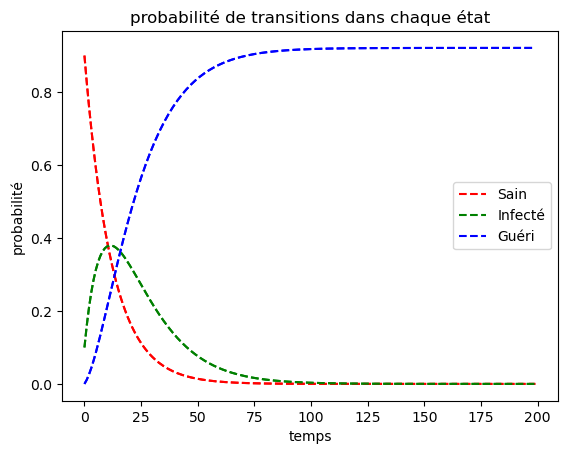

In [132]:
# test pour calDistribution() et drawGraphe()
pi_0=[0.9, 0.1, 0]
drawGraphe(200, MatA, pi_0)

10天后全部被治愈

# Tirage aléatoire des états



In [124]:
def creatMarkov(nbSequence, matrice, pi_0):
    """
    Entree : 
        nbSequence : la taille de liste T
        matrice, pi_0 : le même
    Sortie : 
        une chaine Markov en base de "matrice" et " pi_0"
    """
    chaine=[]
    prob=rd.uniform(0, 1)       #creer une valeur au hasard entre (0, 1)
    
    #insertion du premier letter
    if prob > pi_0[0]:
        chaine.append(1)
    else:
        chaine.append(0)
        while(len(chaine) < nbSequence):      #transitions 0->0
            prob=rd.uniform(0, 1)
            if prob > matrice[0][0]:      
                chaine.append(1)              #on utilise "break" ici,
                break                         #car il n'y pas une transition de 1->0
            chaine.append(0)
    
    while(len(chaine) < nbSequence):          #transitions 1->1
        prob=rd.uniform(0, 1)
        if prob > matrice[1][1]:
            chaine.append(2)
            break
        chaine.append(1)
        
    for i in range(len(chaine), nbSequence):  #transition 2->2
        chaine.append(2)
    
    return chaine

In [129]:
#test pour creatMarkov()
print(creatMarkov(150, MatA, pi_0))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
